# 回帰まとめ

## 回帰とは
- 目的変数が連続値の時にデータに Y = f(X) というモデル(「定量的な関係の構造」)を当てはめる事。
- この時Xを説明変数とよぶ

In [61]:
import numpy as np
# yyplot入れる
def eval(true_, predict_):
    """
    評価用の関数
    """
    
    print("決定係数", r2_score(true_, predict_))
    yvalues = np.concatenate([true_, predict_])
    
    ymin, ymax, yrange = np.amin(yvalues), np.amax(yvalues), np.ptp(yvalues)
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(true_, predict_)
    plt.plot([ymin - yrange * 0.01, ymax + yrange * 0.01], [ymin - yrange * 0.01, ymax + yrange * 0.01])
    plt.xlim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.ylim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.xlabel('y_observed', fontsize=24)
    plt.ylabel('y_predicted', fontsize=24)
    plt.title('Observed-Predicted Plot', fontsize=24)
    plt.tick_params(labelsize=16)
    plt.show()
    
    

## 単回帰

In [51]:
# 単一の特徴量のみでの予測をする
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score


import matplotlib.pyplot as plt

In [8]:
# boston_dataframeを使用する
# 説明変数 13カラム
# 目的変数 単位は、1,000(USD) ボストンの住宅価格
boston = load_boston()

# 説明変数取得
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# 目的変数付与
df["y"] = boston.target

In [9]:
# 訓練用データと評価用データに分割する
train_df, test_df = train_test_split(df)

In [10]:
target_col = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
for target in target_col:
    X_train = train_df.loc[:, [target]]
    Y_train = train_df.loc[:, ["y"]]

    X_test = test_df.loc[:, [target]]
    Y_test = test_df.loc[:, ["y"]]
    
    model = linear_model.LinearRegression()
    model.fit(X_train,Y_train)
    
    pred_y = model.predict(X_test)
    
    print("{}_決定係数:".format(target),r2_score(Y_test, pred_y))

CRIM_決定係数: 0.17668896899806552
ZN_決定係数: 0.1866023803596727
INDUS_決定係数: 0.27031017741960695
CHAS_決定係数: 0.03897762363992052
NOX_決定係数: 0.2472011722057189
RM_決定係数: 0.483769859710247
AGE_決定係数: 0.20009912615885672
DIS_決定係数: 0.09668890113803896
RAD_決定係数: 0.17676277766299797
TAX_決定係数: 0.23810188521289233
PTRATIO_決定係数: 0.31854312896062176
B_決定係数: 0.12370633699474398
LSTAT_決定係数: 0.5678540814697055


# 重回帰分析

In [11]:
target_col = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
X_train = train_df.loc[:, target_col]
Y_train = train_df.loc[:, ["y"]]

X_test = test_df.loc[:, target_col]
Y_test = test_df.loc[:, ["y"]]
    
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)
    
pred_y = model.predict(X_test)
    
print("重回帰分析_決定係数:".format(target),r2_score(Y_test, pred_y))

重回帰分析_決定係数: 0.7577257693657969


## Ridge回帰とは?
- 過学習を防ぐため線形回帰に正則化項(ペナルティ項)としてL2ノルムを導入したモデル
- 最小二乗法の式に正則化項を加え、その最小を求めることでモデル関数を発見する
- L2ノルム : ユークリッド距離と呼ばれるもので、ベクトル成分同士の差の二乗和の平方根

- 0に収束することが出来ないことに留意
- 係数の絶対値の大きさを可能な限り小さくする

## Lasso回帰とは


In [12]:
import pandas as pd

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [13]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
target_col = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]

In [38]:
# Lasso回帰
# 訓練用データと、評価用データに分割する
x_train, x_test, y_train, y_test = train_test_split(df.loc[:,target_col],df["y"],random_state=123)

# モデルの作成
model = Lasso()
model.fit(x_train, y_train)

pred = model.predict(x_test)
r2_score(y_test, pred)

0.6554460628881653

In [37]:
# Ridge回帰

# モデルの作成
model = Ridge()
model.fit(x_train, y_train)

pred = model.predict(x_test)
r2_score(y_test, pred)

0.6775930475897151

In [18]:
# 作成したデータに対して、下記のように説明変数を持ったinputに対して、一意なyが得られる
test_df = x_train.head(1)[target_col]
display(test_df)

predict= model.predict(test_df)
print(predict)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
335,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.9,8.01


[23.82812021]


# LightGBMで線形回帰

In [30]:
import lightgbm as lgb
from sklearn.model_selection import *

In [31]:
# モデルの学習
model = lgb.LGBMRegressor() # モデルのインスタンスの作成
model.fit(X_train, y_train) # モデルの学習

# テストデータの予測
y_pred = model.predict(X_test)
r2_score(y_test, pred)

0.6775930475897151

決定係数 0.6554460628881653


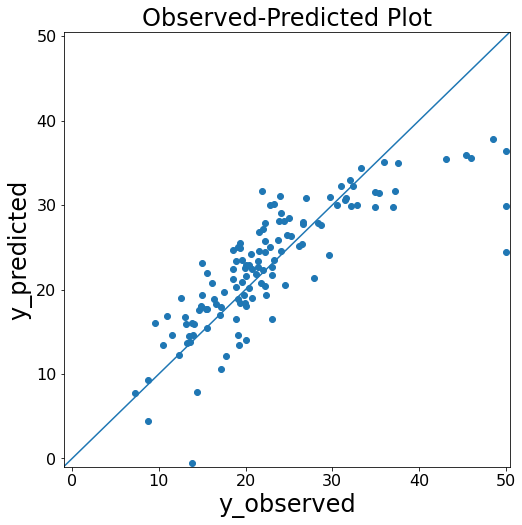

In [60]:
eval(y_test, pred)